In [1]:
print("hellow world ")


hellow world 


In [8]:
import numpy as np
from collections import deque
import random

import matplotlib.pyplot as plt

# Define the maze
maze = [
    [1, 0, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1]
]

# Define start and end points
start = (0, 0)
end = (4, 5)



In [9]:
# Visualization function
def visualize_maze(maze, path=None, visited=None, stack=None, queue=None):
    maze_copy = np.array(maze)
    if visited:
        for v in visited:
            maze_copy[v] = 0.5
    if path:
        for p in path:
            maze_copy[p] = 0.75
    if stack:
        for s in stack:
            maze_copy[s] = 0.25
    if queue:
        for q in queue:
            maze_copy[q] = 0.25
    plt.imshow(maze_copy, cmap='gray')
    plt.show()


In [10]:
# DFS algorithm
def dfs(maze, start, end):
    stack = [start]
    visited = set()
    parent = {start: None}
    
    while stack:
        current = stack.pop()
        if current == end:
            break
        if current in visited:
            continue
        visited.add(current)
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] == 1:
                if (nx, ny) not in visited:
                    stack.append((nx, ny))
                    parent[(nx, ny)] = current
        visualize_maze(maze, visited=visited, stack=stack)
    
    path = []
    while current:
        path.append(current)
        current = parent[current]
    path.reverse()
    return path

In [11]:
# BFS algorithm
def bfs(maze, start, end):
    queue = deque([start])
    visited = set()
    parent = {start: None}
    
    while queue:
        current = queue.popleft()
        if current == end:
            break
        if current in visited:
            continue
        visited.add(current)
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] == 1:
                if (nx, ny) not in visited:
                    queue.append((nx, ny))
                    parent[(nx, ny)] = current
        visualize_maze(maze, visited=visited, queue=queue)
    
    path = []
    while current:
        path.append(current)
        current = parent[current]
    path.reverse()
    return path

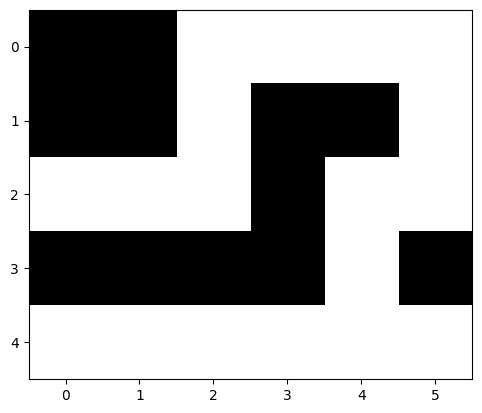

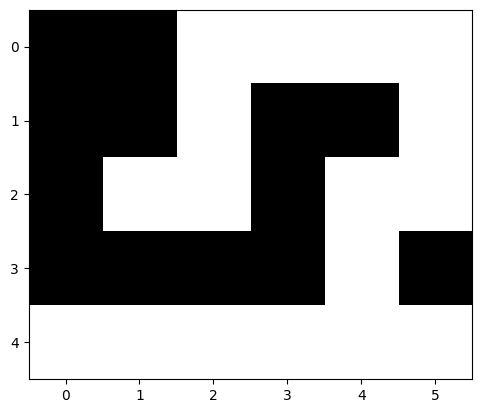

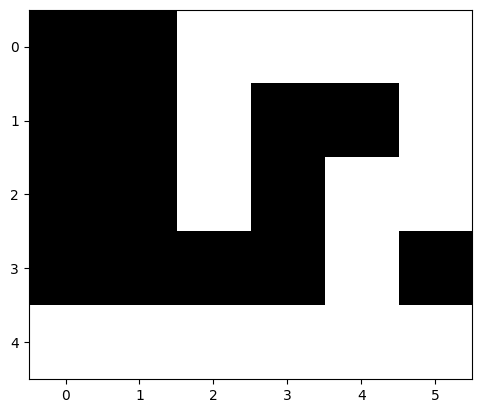

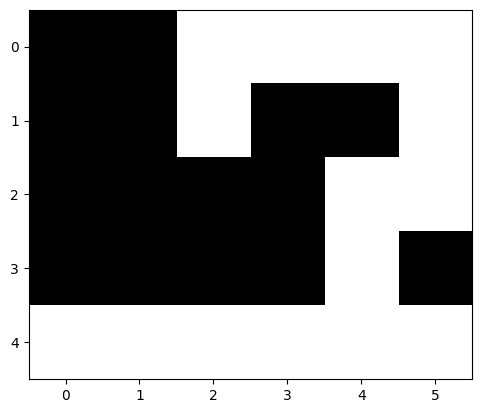

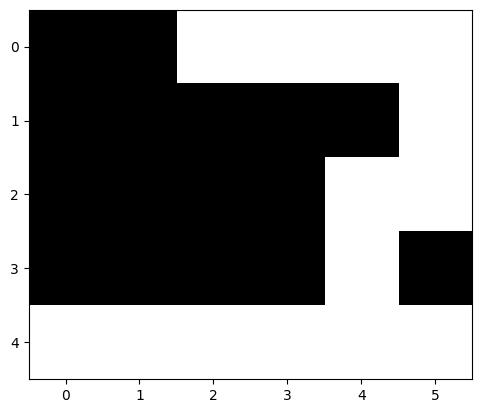

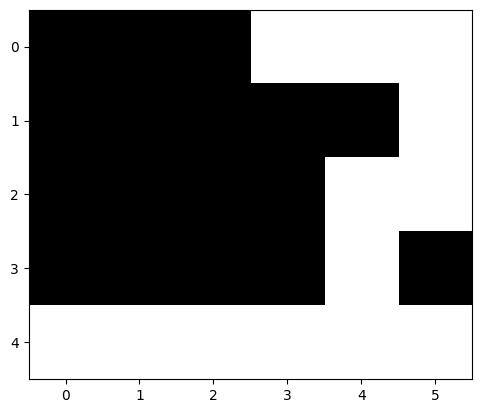

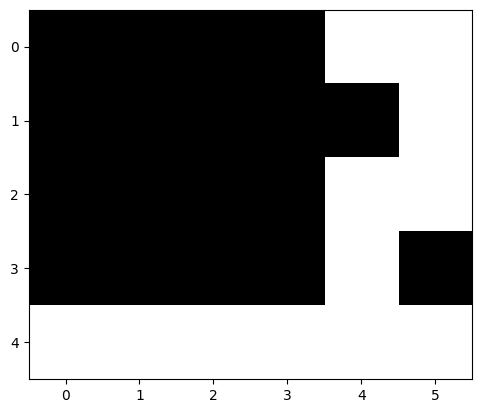

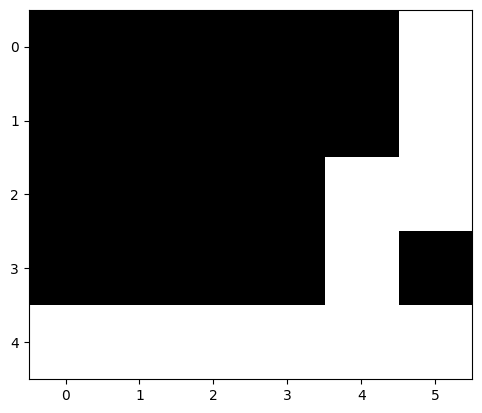

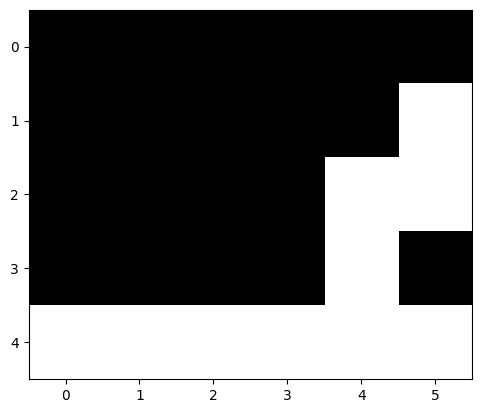

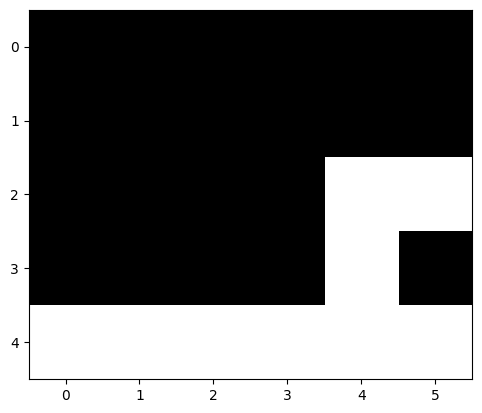

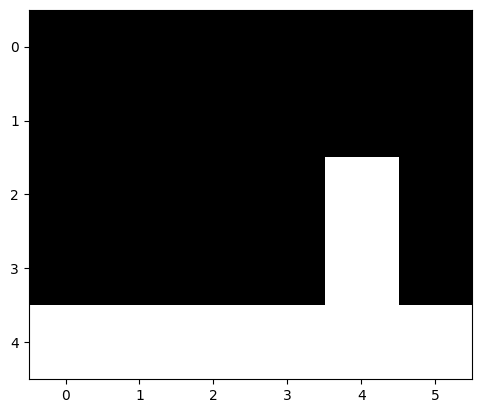

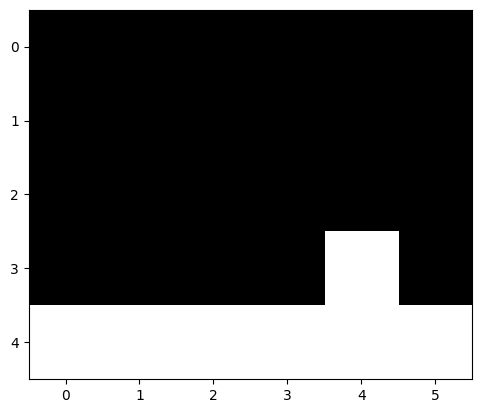

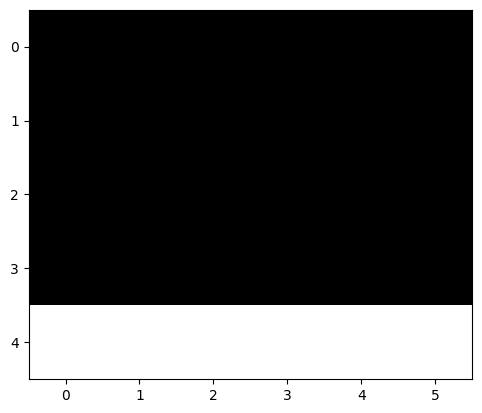

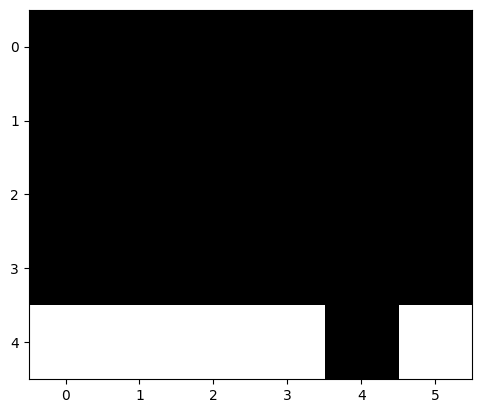

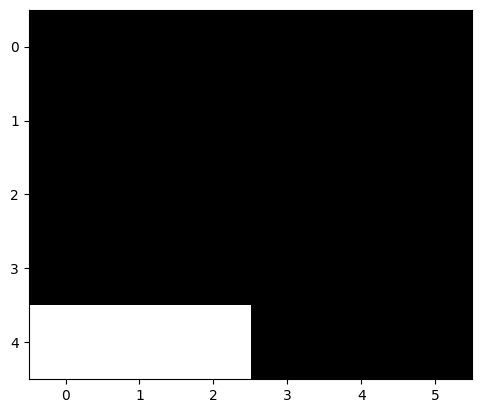

In [12]:
# User choice
algorithm = input("Choose algorithm (DFS/BFS): ").strip().upper()
if algorithm == 'DFS':
    path = dfs(maze, start, end)
elif algorithm == 'BFS':
    path = bfs(maze, start, end)
else:
    print("Invalid choice")

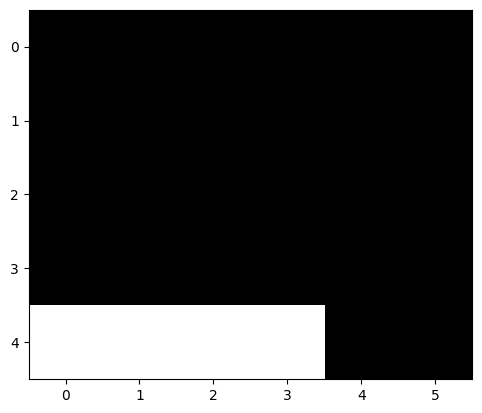

In [13]:
# Visualize final path
visualize_maze(maze, path=path)
def generate_maze(width, height):
    maze = [[1] * width for _ in range(height)]

    def carve_passages_from(cx, cy):
        directions = [(2, 0), (-2, 0), (0, 2), (0, -2)]
        random.shuffle(directions)
        for dx, dy in directions:
            nx, ny = cx + dx, cy + dy
            if 0 <= nx < width and 0 <= ny < height and maze[ny][nx] == 1:
                maze[cy + dy // 2][cx + dx // 2] = 0
                maze[ny][nx] = 0
                carve_passages_from(nx, ny)

    carve_passages_from(random.randrange(0, width, 2), random.randrange(0, height, 2))
    return maze

In [14]:
# Generate a random maze
width, height = 5, 5  # Ensure dimensions are odd
maze = generate_maze(width, height)

# Define start and end points
start = (0, 0)
end = (height - 1, width - 1)


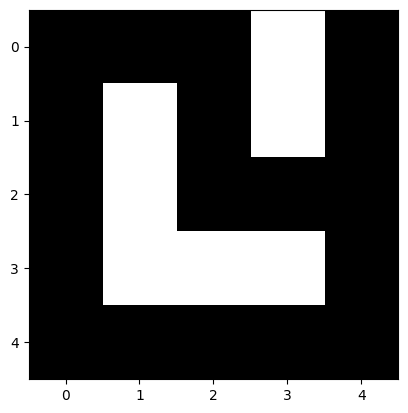

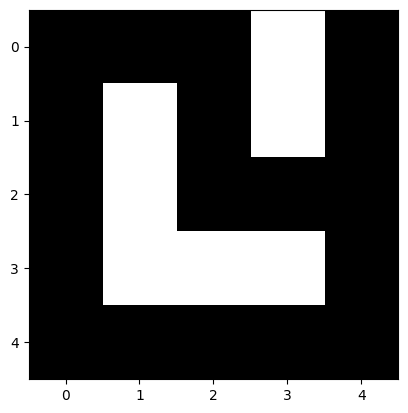

In [15]:
# User choice
algorithm = input("Choose algorithm (DFS/BFS): ").strip().upper()
if algorithm == 'DFS':
    path = dfs(maze, start, end)
elif algorithm == 'BFS':
    path = bfs(maze, start, end)
else:
    print("Invalid choice")

# Visualize final path
visualize_maze(maze, path=path)

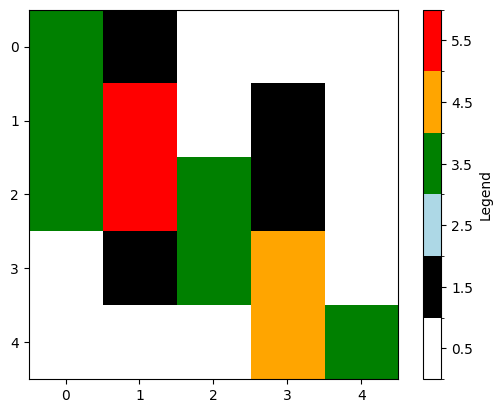

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

def visualize_maze_with_colors(maze, path=None, visited=None, stack=None, queue=None):
    # Create a copy of the maze
    maze_copy = np.array(maze)
    
    # Apply visualization values
    if visited:
        for v in visited:
            maze_copy[v] = 2  # Assign a unique value for visited nodes
    if path:
        for p in path:
            maze_copy[p] = 3  # Assign a unique value for the solution path
    if stack:
        for s in stack:
            maze_copy[s] = 4  # Assign a unique value for stack
    if queue:
        for q in queue:
            maze_copy[q] = 5  # Assign a unique value for queue
    
    # Define custom colors for the values
    cmap = ListedColormap(['white', 'black', 'lightblue', 'green', 'orange', 'red'])
    norm = BoundaryNorm([0, 1, 2, 3, 4, 5, 6], cmap.N)
    
    # Plot the maze
    plt.imshow(maze_copy, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], label='Legend')
    plt.clim(0, 6)
    plt.show()

# Example Usage
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]
visited = [(0, 0), (1, 0), (2, 0)]
path = [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 4)]
stack = [(3, 3), (4, 3)]
queue = [(1, 1), (2, 1)]

visualize_maze_with_colors(maze, path=path, visited=visited, stack=stack, queue=queue)
